In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

# Importing the image samples

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
data = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# Looking at the number of samples present inside the MNIST data set

In [5]:
print("Training set: {}".format(data.train.num_examples))
print("Validation Data: {}".format(data.validation.num_examples))
print("Testing set: {}".format(data.test.num_examples))

Training set: 55000
Validation Data: 5000
Testing set: 10000


In [6]:
# The shape of the first image in the sample
data.test.images[0].shape

(784,)

In [7]:
# Since it is in a linear shape we can reshape to form a proper 28*28 shape
data.test.images[0].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

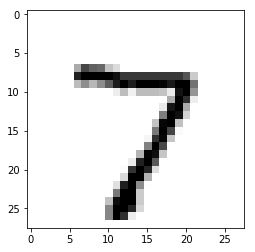

In [8]:
first_image = data.test.images[0].reshape(28,28)
plt.imshow(first_image, cmap='binary')

Declaring variables

In [9]:
# since the image size is 28x28
img_size = 28

# total no. of pixels 
img_size_flat = img_size * img_size

# the shape of the image
img_shape = (img_size, img_size)

# No. of classifications, here 10, since there are 10 basic numbers from 0-9
num_classes = 10

In [10]:
y_test = data.test.labels[0:10]
y_test

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
data.test.cls = np.argmax(data.test.labels, axis=1)
data.test.cls[0]

7

A helper function to plot the image

In [11]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
            
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

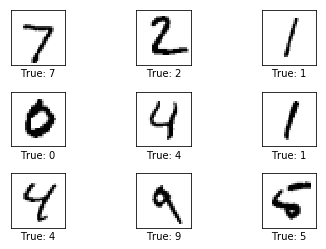

In [14]:
data.test.cls = np.argmax(data.test.labels, axis=1)

images = data.test.images[0:9]

cls_true = data.test.cls[0:9]

plot_images(images=images, cls_true=cls_true)

Placeholder Variables 

In [19]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
x_test = data.test.images
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [16]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [17]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_true

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [20]:
y_true_cls

<tf.Tensor 'Placeholder_4:0' shape=(?,) dtype=int64>

Variables to be optimized 

In [22]:
# Weights
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
weights

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [24]:
biases = tf.Variable(tf.zeros([num_classes]))
biases

<tf.Variable 'Variable_2:0' shape=(10,) dtype=float32_ref>

Model

In [25]:
logits = tf.matmul(x, weights) + biases
logits

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [28]:
y_pred = tf.nn.softmax(logits)
y_pred

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [29]:
y_pred_cls = tf.argmax(y_pred, axis=1)
y_pred_cls

<tf.Tensor 'ArgMax_1:0' shape=(?,) dtype=int64>

In [32]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y_true)
cross_entropy

<tf.Tensor 'softmax_cross_entropy_with_logits_2/Reshape_2:0' shape=(?,) dtype=float32>

In [33]:
cost = tf.reduce_mean(cross_entropy)

Optimization Method

In [35]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
optimizer

<tf.Operation 'GradientDescent_1' type=NoOp>

In [36]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [37]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Tensorflow Session

In [38]:
# Create a session to execute the graphh
session = tf.Session()

In [41]:
# Initialize all the declared variables
session.run(tf.global_variables_initializer())

In [81]:
# a sample size to train the data instead of using the entire images
batch_size = 1000

In [82]:
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size=batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [83]:
feed_dict_test = {x: data.test.images,
                 y_true: data.test.labels,
                 y_true_cls: data.test.cls}

In [84]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [85]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [95]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [96]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Executing the model

In [97]:
print_accuracy()

Accuracy on test-set: 92.3%


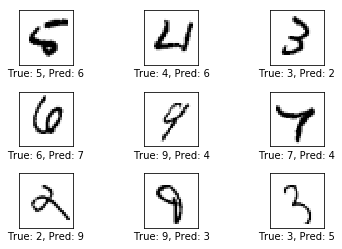

In [98]:
plot_example_errors()

In [99]:
optimize(num_iterations=1000)

In [100]:
print_accuracy()

Accuracy on test-set: 92.3%


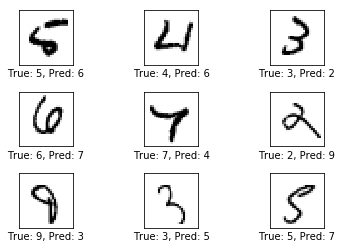

In [101]:
plot_example_errors()

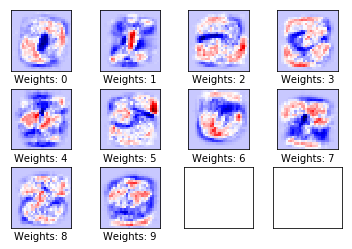

In [102]:
plot_weights()

[[ 959    0    2    2    0    5    8    2    2    0]
 [   0 1109    3    2    0    1    4    2   14    0]
 [   7    9  913   17    9    4   14   12   40    7]
 [   3    0   16  920    0   26    3   12   21    9]
 [   1    2    4    1  911    0   12    5    9   37]
 [   9    2    4   33    9  774   17    6   31    7]
 [  10    3    3    2    9   15  910    3    3    0]
 [   1    6   20   10    8    1    0  947    4   31]
 [   6    9    6   18    9   27   10    9  871    9]
 [  11    8    1    8   26    7    0   23    8  917]]


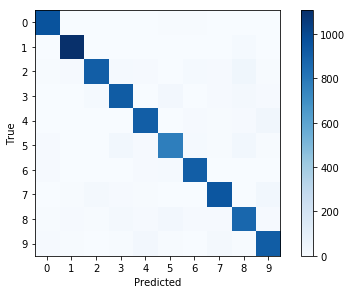

In [103]:
print_confusion_matrix()